In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


2026-01-13 09:51:38.094544: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-13 09:51:38.104567: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-13 09:51:38.177300: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2026-01-13 09:51:38.222605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768278098.273618    6072 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768278098.28

In [7]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_path = '/home/admin1/Downloads/archive (2)/Dataset'

train_dir = os.path.join(base_path, 'Train') 

IMG_SIZE = 64 
BATCH_SIZE = 32


train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)


In [9]:

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='training'
)

# 3. Point to SAME train_dir and use subset='validation'
val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    subset='validation'
)

Found 232 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


In [11]:
model = Sequential([
    
    Flatten(input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    
    # Hidden Layer 1
    Dense(512, activation='relu'),
    Dropout(0.3), 
    
    # Hidden Layer 2
    Dense(256, activation='relu'),
    
    # Hidden Layer 3
    Dense(128, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.summary()

/home/admin1/anaconda3/lib/python3.9/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2026-01-13 09:55:24.806171: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,456,321 (24.63 MB)

 Trainable params: 6,456,321 (24.63 MB)

 Non-trainable params: 0 (0.00 B)

/home/admin1/anaconda3/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 713ms/step - accuracy: 0.5183 - loss: 2.4453 - val_accuracy: 0.9464 - val_loss: 0.1936
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - accuracy: 0.8294 - loss: 0.5908 - val_accuracy: 0.8571 - val_loss: 0.5417
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 629ms/step - accuracy: 0.8527 - loss: 0.5884 - val_accuracy: 0.9643 - val_loss: 0.1842
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 613ms/step - accuracy: 0.9264 - loss: 0.2276 - val_accuracy: 0.9643 - val_loss: 0.1439
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 589ms/step - accuracy: 0.9151 - loss: 0.2460 - val_accuracy: 0.8929 - val_loss: 0.2115
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 0.9257 - loss: 0.2203 - val_accuracy: 0.9643 - val_loss: 0.2109
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 554ms/step - accuracy: 0.9380 - loss: 0.2040 - val_accuracy: 0.9643 - val_loss: 0.1310
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 578ms/step - accuracy: 0.9261 - loss: 0.2190 - val_accuracy: 0.8929 - val_loss:

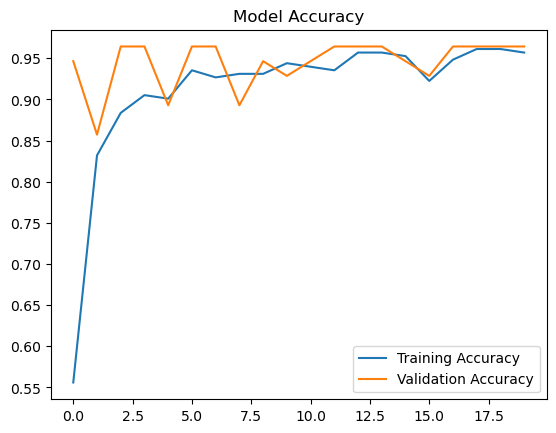

In [13]:

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()